In [1]:
import sys
sys.path.append('../')
sys.path.append('../../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import os

In [3]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 18,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [4]:
def sort_func(e):
    return int(e.split(".")[0])

In [5]:
tensor_dir = "../measurements/layer_8/tensor/"
tensor_paths = os.listdir(tensor_dir)
tensor_paths.sort(key=sort_func)

In [9]:
tensors = []

for i in range(len(tensor_paths)):
    tensors.append(torch.load(tensor_dir+tensor_paths[i]))

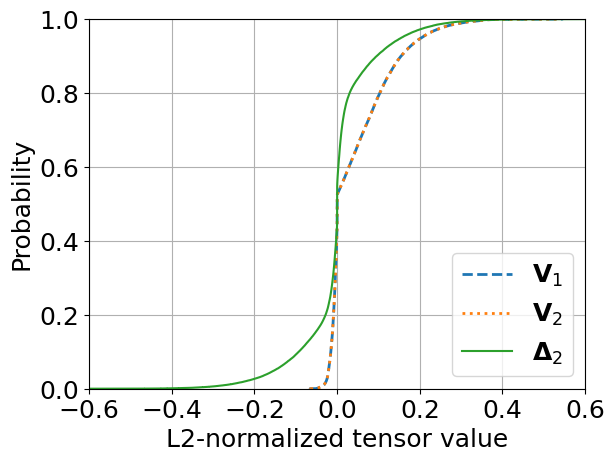

In [41]:
fig, axs = plt.subplots()
axs.ecdf(torch.nn.functional.normalize(tensors[0]).reshape(tensors[0].numel()).tolist(),linestyle="--",linewidth=2, label=r"$\mathbf{V}_1$")
axs.ecdf(torch.nn.functional.normalize(tensors[1]).reshape(tensors[1].numel()).tolist(),linestyle=":",linewidth=2,label=r"$\mathbf{V}_2$")
axs.ecdf(torch.nn.functional.normalize((tensors[1]-tensors[0])).reshape(tensors[1].numel()).tolist(), label=r"$\mathbf{\Delta}_2$")

axs.set_xlim(-0.6, 0.6)
axs.set_ylim(0, 1)

plt.legend(loc='lower right')

plt.grid()
plt.xlabel("L2-normalized tensor value")
plt.ylabel("Probability")
plt.savefig("../figures/tensor_cdf.pdf", bbox_inches='tight')

In [37]:
sparsity1 = []

thresh = []

for i in range(31):
    thresh.append(i/100)
    diff_tensor_normal = torch.nn.functional.normalize(tensors[1]-tensors[0])
    pruned_tensor = abs(diff_tensor_normal) > i/100
    sparsity1.append(1-torch.sum(pruned_tensor).item()/pruned_tensor.numel())

    # diff_tensor_normal = torch.nn.functional.normalize(tensors[20]-tensors[0])
    # pruned_tensor = abs(diff_tensor_normal) > i/300
    # sparsity2.append(1-torch.sum(pruned_tensor).item()/pruned_tensor.numel())

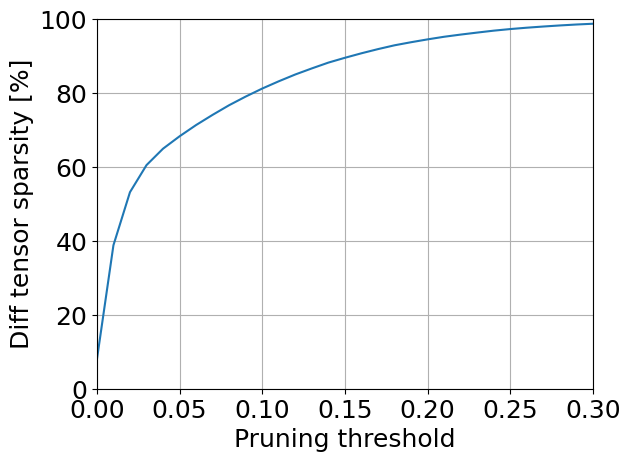

In [40]:
plt.figure()
plt.plot(thresh,np.array(sparsity1)*100)
plt.grid()
plt.xlim([0, 0.3])
plt.ylim([0,100])
plt.xlabel("Pruning threshold")
plt.ylabel("Diff tensor sparsity [%]")
plt.savefig("../figures/tensor_sparsity.pdf", bbox_inches='tight')

0.05480306952662722